<a href="https://colab.research.google.com/github/anagdesa/AnalisaPasangSurut/blob/main/AnalisaPasut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Tugas Akhir atau Kelompok 3 – DSA-ITB07**
1.	Nama	: Willdan Aprizal Arifin	Nomor Registrasi	: 05124873121-65
2. 	Nama	: Rini Oktavia	Nomor Registrasi	: 05124873010-2
3. 	Nama	: Gramandha Wega Intyanto	Nomor Registrasi	: 05124873151-29 

# **DESKRIPSI MASALAH**
Ketinggian air laut menentukan aktifitas masyarakat pesisir. Oleh karena itu prediksi ketinggian pasang surut air laut dapat menjadi panduan bagi masyarakat pesisir, terutama untuk menentukan waktu yang tepat untuk berlayar. Untuk dapat memprediksi data pasang surut air laut, data yang diperlukan adalah data perekaman ketinggian air laut yang sudah terjadi sebelumnya. Variabel prediktor yang diasumsikan mempengaruhi pasang surut air laut adalah waktu, curah hujan, arah angin, kecepatan angin, kelembaban udara, suhu udara, dan jarak antara bulan dan bumi. Berdasarkan model yang diterapkan, **diharapkan** ketinggian air laut pada periode waktu tertentu dapat diprediksi.

# **PENGAMBILAN DATA**
Semua data terdapat waktu (bulan, tanggal, tahun)
1.Curah Hujan
2. Temperatur: Maksimum, Minimum, Rata-rata
3. Kelembaban Rata-rata
4. Kecepatan Angin: Maksimum, Rata-rata
5. Arah Angin: Terbanyak, Saat Kecepatan Maksimum
6. Lamanya Penyinaran Matahari
7. Semua data terdapat waktu (bulan, tanggal, tahun)
```
Data Dari: [BMKG] (https://dataonline.bmkg.go.id/home)
```


Data Pasang Surut Air Laut dan waktu (bulan, tanggal, tahun)
```
Data Dari:  [Pasang-Phidrosal] (https://pasut-pushidrosal.luweswatersensor.com/guest/public_stations)
```

In [1]:
# library
import pandas as pd

# **Proses Memasukkan Data**

In [2]:
#download directory dan simpan data pasut
!git clone https://github.com/anagdesa/AnalisaPasangSurut.git

Cloning into 'AnalisaPasangSurut'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


In [11]:
# ubah menjadi data frame
df_pasut = pd.read_csv('/content/AnalisaPasangSurut/pasutbakauheni.csv')
dfbmkg = pd.read_excel('/content/AnalisaPasangSurut/BMKGData.xlsx')


In [4]:
print(len(df_pasut))
print(len(df_bmkg))

25245
1095


In [5]:
df_pasut.head(25245)

,id_pasut,time,water_level
0,1,2019-06-10 1:00:00,-4.610
1,2,2019-06-10 0:00:00,-4.610
2,3,2019-06-09 23:00:00,-4.610
3,4,2019-06-09 22:00:00,-4.610
4,5,2019-06-09 21:00:00,-4.610
...,...,...,...
25240,25241,2016-02-04 23:00:21,2.887
25241,25242,2016-02-04 22:00:29,3.122
25242,25243,2016-02-04 21:00:27,3.326
25243,25244,2016-02-04 20:00:05,3.415


In [6]:
df_bmkg.head(1095)

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,01-01-2017,25.0,32.6,28.2,81.0,0.7,6.8,7.0,180.0,2.0,N
1,02-01-2017,25.0,34.2,28.8,80.0,8888.0,5.5,7.0,180.0,2.0,N
2,03-01-2017,26.0,NaN,29.4,74.0,0.0,8.0,6.0,270.0,2.0,N
3,04-01-2017,26.0,32.6,28.2,84.0,2.1,4.5,6.0,180.0,2.0,N
4,05-01-2017,25.0,32.6,26.9,82.0,7.1,0.8,6.0,340.0,2.0,N
...,...,...,...,...,...,...,...,...,...,...,...
1090,27-12-2019,25.0,32.6,28.6,83.0,6.8,3.5,6.0,180.0,2.0,C
1091,28-12-2019,26.0,33.2,28.2,84.0,NaN,1.4,4.0,225.0,2.0,S
1092,29-12-2019,24.0,32.6,28.5,83.0,109.8,4.0,9.0,90.0,4.0,E
1093,30-12-2019,26.0,35.0,29.7,78.0,NaN,1.0,6.0,270.0,2.0,C


# **Visualisasi Data**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


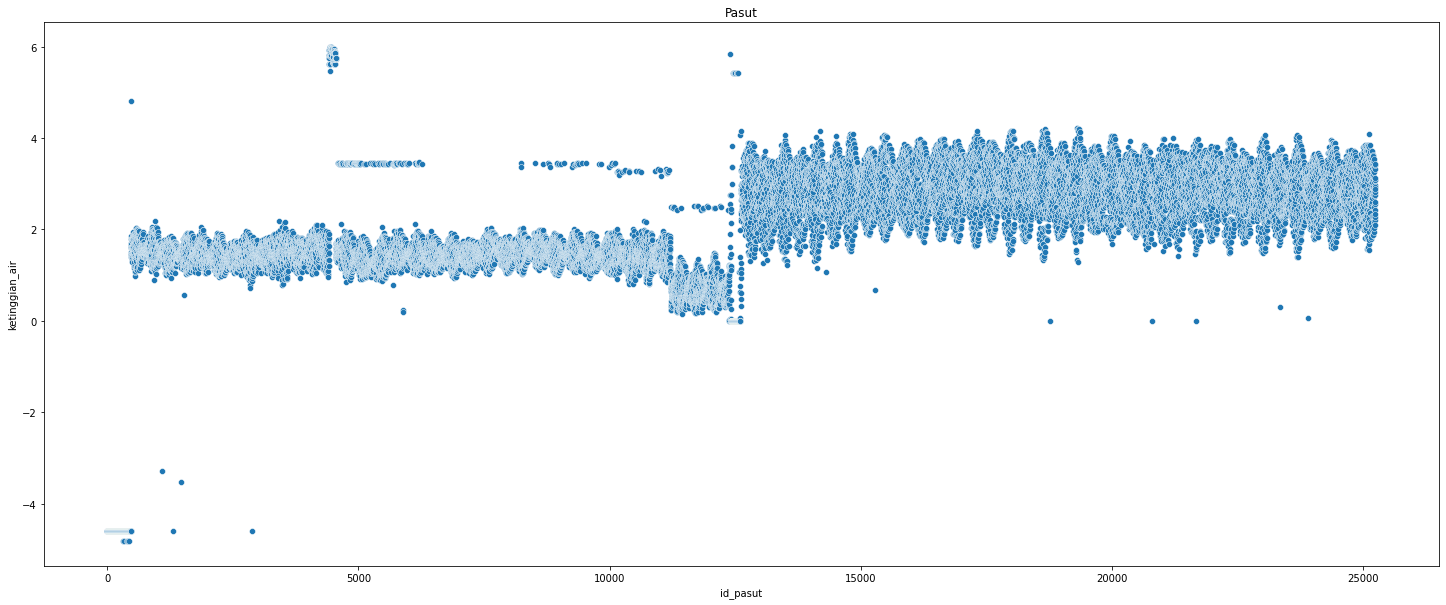

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df_pasut = df_pasut.rename(columns={ 'time':'waktu', 'water_level':'ketinggian_air'})

x = df_pasut["id_pasut"]
y = df_pasut['ketinggian_air']

plt.figure(figsize=(25,10))
sns.scatterplot(x, y,)
plt.title('Pasut')
plt.show()

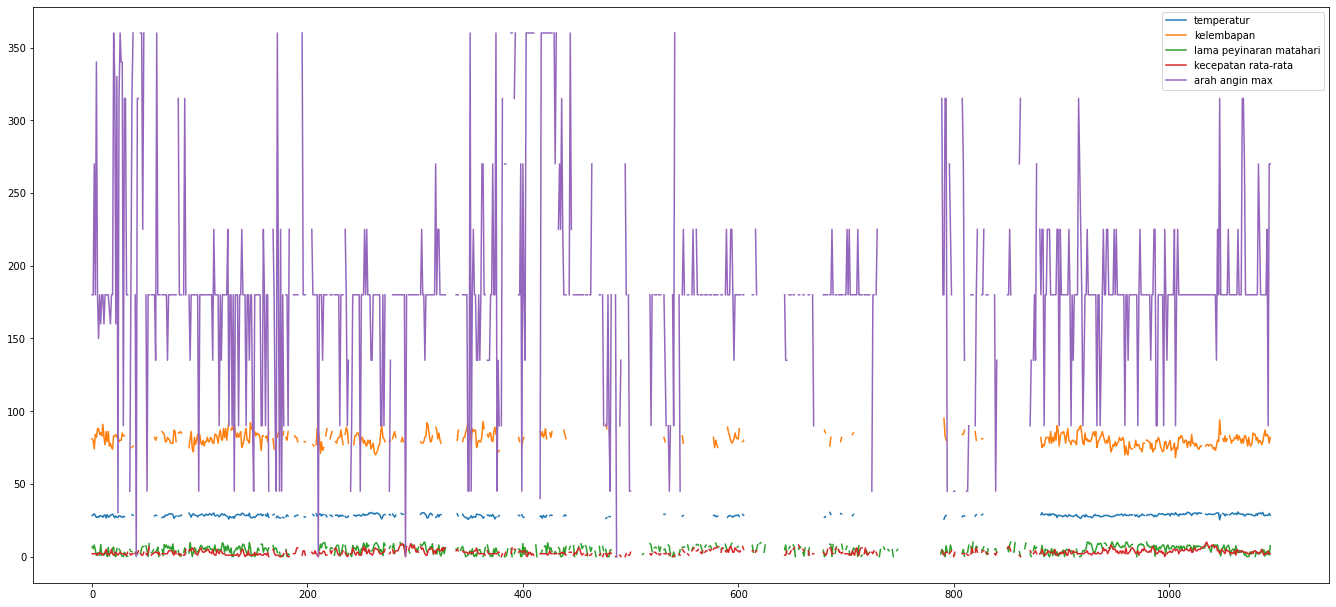

In [14]:
fig = plt.figure()
ax = fig.add_axes([0,0,3,2])
data1 = dfbmkg['Tavg']
data2 = dfbmkg['RH_avg']
#data3 = dfbmkg['RR']
data4 = dfbmkg['ss']
data5 = dfbmkg['ff_avg']
data6 = dfbmkg['ddd_x']
# data7 = dfbmkg['ddd_car']

ax.plot(data1)
ax.plot(data2)
#ax.plot(data3)
ax.plot(data4)
ax.plot(data5)
ax.plot(data6)
# ax.plot(data7)
plt.legend(labels  = ['temperatur', 'kelembapan', 'lama peyinaran matahari', 'kecepatan rata-rata', 'arah angin max',])
plt.show()
